In [3]:
import itertools
import datacontrol
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import KFold
import validation

In [17]:
alpha = np.linspace(0.01,10, 1000)
TrainingData = datacontrol.readFile("../data/Development.csv")
X, Y = datacontrol.divide(TrainingData)
kf = KFold(n_splits=2) 

In [18]:
results = []
for a in alpha:
    reg = linear_model.Ridge(alpha=a)
    val, train = validation.kFoldCross(reg.fit, reg.predict, X, Y, 5)
    results.append([*val, *train, a])

In [19]:
newresults = []
#convert the results
for i in results:
    newresults.append([np.mean(np.array(i[:4])),np.mean(np.array(i[5:9])), i[10]])
df = pd.DataFrame(newresults)
df = df.rename(index=str, columns={0: "mean Validation Error", 1: "Mean training", 2:"alpha"})
df.to_csv("../result/LinearModelAlpha.csv")

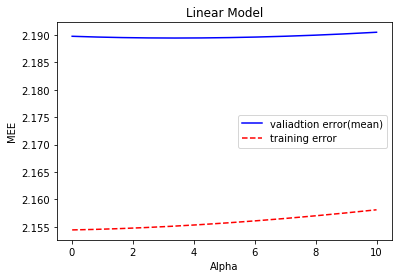

In [21]:
import matplotlib.pyplot as plt
df = pd.read_csv("../result/LinearModelAlpha.csv")
plt.plot(df["alpha"], df["mean Validation Error"], '-b', label='valiadtion error(mean)')
plt.plot(df["alpha"], df["Mean training"], '--r', label='training error')
plt.xlabel("Alpha")
plt.ylabel("MEE")
plt.title("Linear Model")
plt.legend(loc = 'center right')

In [22]:
df.sort_values("mean Validation Error")

,Unnamed: 0,mean Validation Error,Mean training,alpha
339,339,2.189452,2.155128,3.40
340,340,2.189452,2.155131,3.41
338,338,2.189452,2.155125,3.39
341,341,2.189452,2.155134,3.42
337,337,2.189452,2.155122,3.38
342,342,2.189452,2.155137,3.43
336,336,2.189452,2.155119,3.37
343,343,2.189452,2.155140,3.44
335,335,2.189452,2.155116,3.36
344,344,2.189452,2.155143,3.45
